Import necessary packages

In [7]:
# import the necessary packages
import matplotlib.pyplot as plt
import apriltag
import argparse
import cv2

Function to display notebook

In [8]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

Implementing AprilTag

In [9]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "example_02.png"
}

In [10]:
# load the input image and convert it to grayscale
print("[INFO] loading image...")
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

[INFO] loading image...


In [11]:
# define the AprilTags detector options and then detect the AprilTags
# in the input image
print("[INFO] detecting AprilTags...")
# apriltag will not auto infer what family is used, MUST specify: https://april.eecs.umich.edu/software/apriltag
options = apriltag.DetectorOptions(families="tag36h11")
detector = apriltag.Detector(options)
results = detector.detect(gray)
print("[INFO] {} total AprilTags detected".format(len(results)))

[INFO] detecting AprilTags...
[INFO] 5 total AprilTags detected


[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11
[INFO] tag family: tag36h11


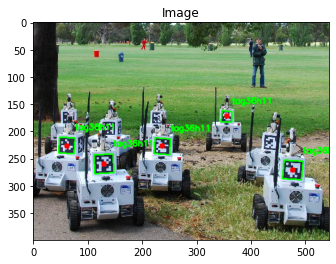

In [12]:
# loop over the AprilTag detection results
for r in results:
	# extract the bounding box (x, y)-coordinates for the AprilTag
	# and convert each of the (x, y)-coordinate pairs to integers
	(ptA, ptB, ptC, ptD) = r.corners
	ptB = (int(ptB[0]), int(ptB[1]))
	ptC = (int(ptC[0]), int(ptC[1]))
	ptD = (int(ptD[0]), int(ptD[1]))
	ptA = (int(ptA[0]), int(ptA[1]))

	# draw the bounding box of the AprilTag detection
	cv2.line(image, ptA, ptB, (0, 255, 0), 2)
	cv2.line(image, ptB, ptC, (0, 255, 0), 2)
	cv2.line(image, ptC, ptD, (0, 255, 0), 2)
	cv2.line(image, ptD, ptA, (0, 255, 0), 2)

	# draw the center (x, y)-coordinates of the AprilTag
	(cX, cY) = (int(r.center[0]), int(r.center[1]))
	cv2.circle(image, (cX, cY), 5, (0, 0, 255), -1)

	# draw the tag family on the image
	tagFamily = r.tag_family.decode("utf-8")
	cv2.putText(image, tagFamily, (ptA[0], ptA[1] - 15),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
	print("[INFO] tag family: {}".format(tagFamily))

 # show the output image after AprilTag detection
plt_imshow("Image", image)